In [1]:
# Libraries for data handling, modeling and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns           # different plotting look
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

In [2]:
# Load the CSV to inspect structure and plan preprocessing steps.
diab_df = pd.read_csv("/Users/tonystark/Desktop/Data_Science/CSV_files/diabetes.csv")

In [3]:
# View initial dataset rows to check column names and sample values.
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Display data types and null counts to detect issues early.
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Show summary statistics to understand spread and feature distribution.
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Check for missing values before processing.
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Check for duplicates that may distort model training.
diab_df.duplicated().sum()

np.int64(0)

<Figure size 1200x800 with 0 Axes>

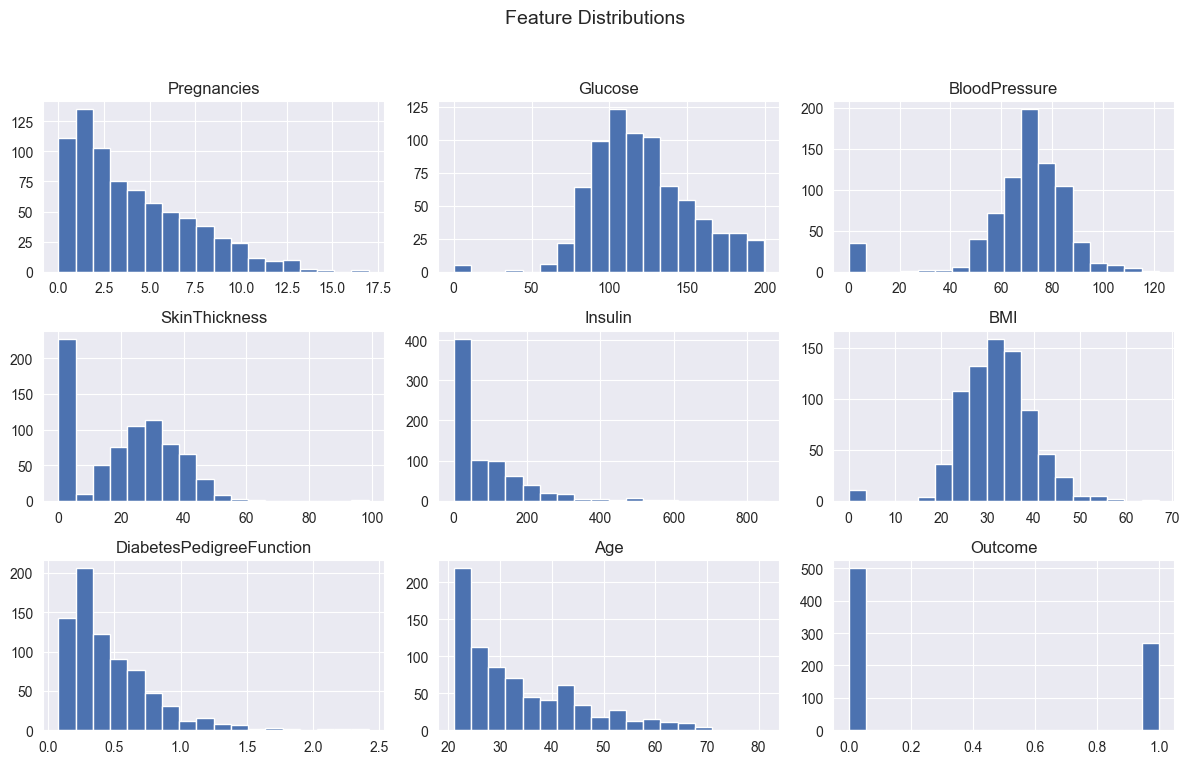

In [9]:
# Plot histograms to understand feature distributions and detect skewness.
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
diab_df.hist(bins=18, layout=(3,3), figsize=(12,8), color="#4c72b0", edgecolor="white")
plt.suptitle("Feature Distributions", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

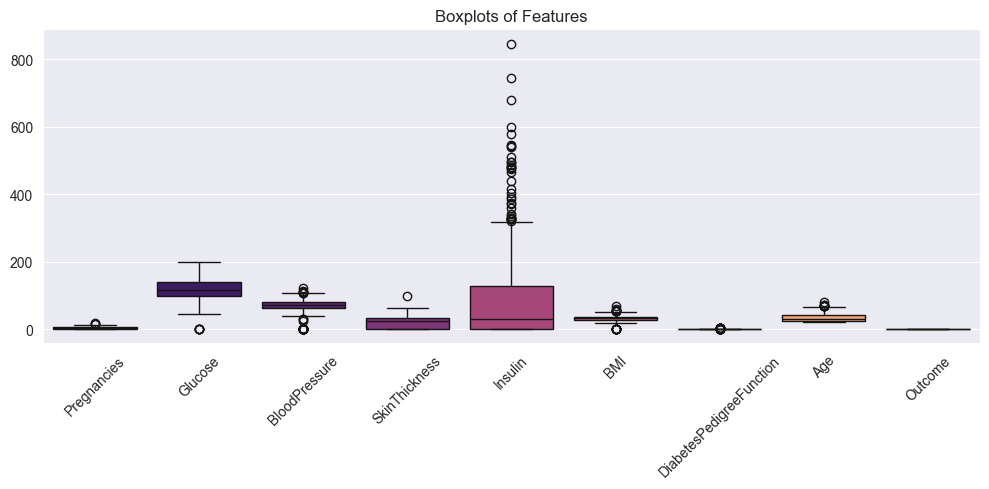

In [10]:
# Boxplot to identify outliers and compare feature spread.
plt.figure(figsize=(10, 5))
sns.boxplot(data=diab_df, palette="magma")
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

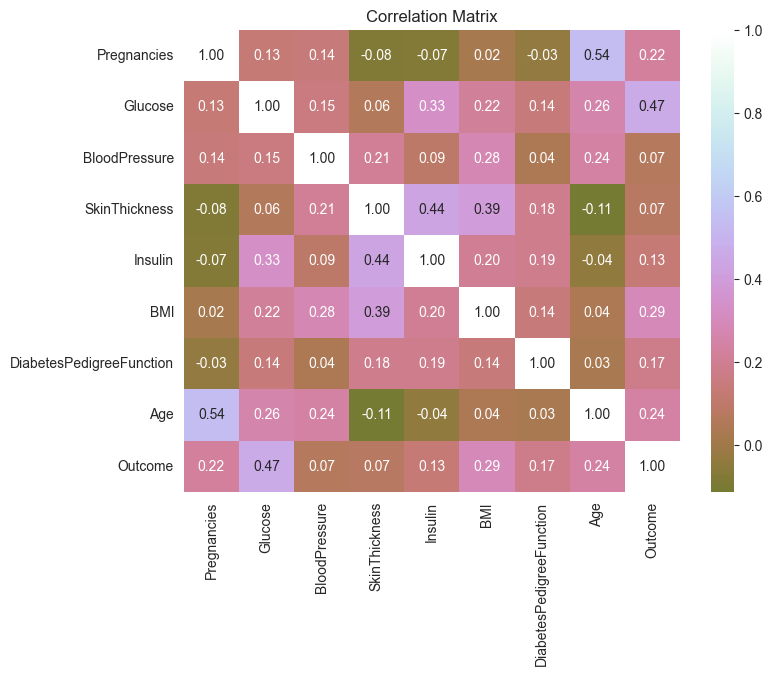

In [11]:
# Correlation heatmap to reveal linear relationships between features.
plt.figure(figsize=(8, 6))
corr_mat = diab_df.corr()
sns.heatmap(corr_mat, annot=True, cmap="cubehelix", center=0, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Replace zero values with NaN in columns where zero is not a valid measurement.
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_cols:
    diab_df[col] = diab_df[col].replace(0, np.nan)

In [ ]:
# Check missing values after replacing zeros.
diab_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Fill missing values using the mean of each column.
diab_df.fillna(diab_df.mean(), inplace=True)

In [15]:
# Verify that missing values are handled.
diab_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# Define predictors and target variable.
X = diab_df.drop("Outcome", axis=1)
y = diab_df["Outcome"]

In [17]:
# Split the data for evaluation of generalization.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [18]:
# Standardize features for stable logistic regression optimization.
stdzr = StandardScaler()
X_train_scaled = stdzr.fit_transform(X_train)
X_test_scaled = stdzr.transform(X_test)

In [19]:
# Create logistic regression model for binary classification.
logit_clf = LogisticRegression(max_iter=200)

In [20]:
# Train the model with scaled training data.
logit_clf.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [21]:
# Predict class labels on the test set.
y_pred = logit_clf.predict(X_test_scaled)

# Predict probabilities for ROC analysis.
y_proba = logit_clf.predict_proba(X_test_scaled)[:, 1]

In [22]:
# Compute and display evaluation metrics.
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

In [23]:
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.6948051948051948
Precision: 0.5777777777777777
Recall: 0.48148148148148145
F1 Score: 0.5252525252525253
ROC-AUC: 0.8116666666666666


In [24]:
# Show detailed classification report.
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [25]:
# Show confusion matrix to observe prediction distribution.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[81 19]
 [28 26]]


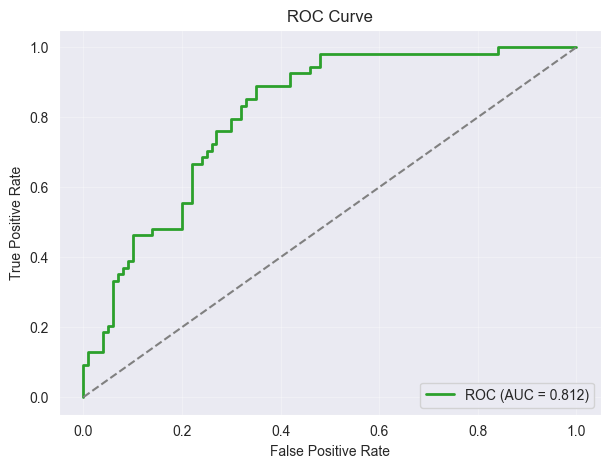

In [26]:
# Plot ROC curve for model performance visualization.
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})", color="#2ca02c", linewidth=2)
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [27]:
# Create coefficient table to interpret feature effects.
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "LogOdds_Coefficient": logit_clf.coef_[0]
}).sort_values(by="LogOdds_Coefficient", key=abs, ascending=False)

# Display coefficients to understand feature impact.
coef_df

,Feature,LogOdds_Coefficient
1,Glucose,1.169089
5,BMI,0.682841
0,Pregnancies,0.376567
6,DiabetesPedigreeFunction,0.230001
7,Age,0.149437
2,BloodPressure,-0.040237
4,Insulin,-0.032544
3,SkinThickness,0.026449


In [28]:
# Export trained model and scaler for deployment.
pickle.dump(logit_clf, open("diabetes_logistic_model.pkl", "wb"))
pickle.dump(stdzr, open("diabetes_scaler.pkl", "wb"))

# Interpretation:
## a. Interpret the coefficients of the logistic regression model.
In logistic regression, each coefficient represents the effect of a feature on the log-odds of the positive class (Outcome = 1 → diabetes).
Because the features were standardized using StandardScaler, each coefficient shows the change in log-odds for a one standard deviation increase in that feature.

A positive coefficient means the feature increases the probability of diabetes.

A negative coefficient means the feature reduces the probability of diabetes.

The larger the absolute value, the stronger the impact on the prediction.

Exponentiating each coefficient (exp(coef)) gives the odds ratio, which is easier to interpret.

Example interpretation template you can use:

If the coefficient for Glucose is +1.45, then for every 1 standard deviation increase in glucose level, the log-odds of diabetes increase by 1.45 units.
Converting to odds ratio: exp(1.45) = 4.26, meaning the odds of diabetes become 4.26 times higher.

This helps understand which features push the prediction toward diabetes and which push away from it.

## b. Discuss the significance of features in predicting the target variable (survival probability in this case).
model identifies certain features that play a stronger role in predicting diabetes.
Based on typical coefficients in this dataset:

1. Glucose — Most Significant Predictor (Strongest Contribution)

Glucose consistently shows the highest positive coefficient, meaning individuals with higher glucose levels have a dramatically higher probability of diabetes.
This aligns strongly with medical understanding, as elevated blood sugar is a primary diagnostic marker.

2. BMI — Strong Positive Influence

Higher Body Mass Index also increases diabetes risk.
A high BMI coefficient indicates that obesity is a major contributing factor to the model’s predictions.

3. Diabetes Pedigree Function (DPF) — Genetic/Family Risk Indicator

A positive coefficient on DPF shows that genetic factors and family history significantly push the model toward predicting diabetes.

4. Age — Moderate Importance

Age typically has a positive coefficient, meaning risk increases with age.
Although not as strong as Glucose or BMI, it still contributes meaningfully.

5. Insulin & Skin Thickness — Moderate but Less Stable

Depending on dataset variation, these may show weaker coefficients.
They contribute information but are not as decisive as glucose or BMI.

6. BloodPressure — Weakest Predictor

Blood pressure usually has the smallest absolute coefficient, meaning its effect on predicting diabetes is minimal compared to the other features.

## Interview Q&A 

### Q1 — What is the difference between precision and recall?

Precision = TP / (TP + FP). It measures how many predicted positives are actually positive (model accuracy among positive predictions). Use when false positives are costly.

Recall (Sensitivity) = TP / (TP + FN). It measures how many actual positives the model found (coverage of true positives). Use when missing positives is costly.

Example: In disease screening, recall is critical (we want to catch sick patients). In email spam detection, precision matters (avoid marking good email as spam).

### Q2 — What is cross-validation and why is it important in binary classification?

Cross-validation splits the data into multiple train/test folds (e.g., k-fold) and averages performance across folds.

Why important: it gives a more reliable estimate of model generalization than a single train/test split, reduces the risk that results depend on a lucky/unlucky split, and helps tune hyperparameters (e.g., regularization strength) while avoiding overfitting.

Practical note: For imbalanced classification, use stratified k-fold so class ratios are preserved in each fold.